# Classification on Raisin Dataset Proposal

#### Group 53: Sophia Zhang, Pritam Cooner, Jun Lee, Haibin Yu
#### October 29th, 2022

## Introduction

All aspects of the natural life around us are surrounded by patterns and relationships. Although some of these have been discovered, many natural phenomena are unexplainable as of today. Classification is used to further discern these natural patterns and make sense of our world by specifying and identifying different types or species of nature. Within this project, we will be aiming to build a prediction model on classifying the type of raisins, Kecimen or Besni, with selected predictors using k-nearest neighbors algorithm. We will be utilizing the raisin dataset from UCI Machine Learning Repository for this project. Within this dataset, 900 raisin grains were collected between two types of Turkish raisins, Kecimen and Besni. Images were taken of these 900 raisins and 7 physical features of the raisins were identified, including the raisin's area, perimeter, length, and more. We use this dataset and identify key features that will allow us to classify whether the raisin is Kecimen or Besni. By doing so, we will show the effectiveness of classification and show how this can be extrapolated to further and more complex phenomena in our world. 


## Preliminary Exploratory Data Analysis

First, load the packages.

In [10]:
library(repr)
library(tidyverse)
library(tidymodels)

Next, load the raisin dataset, eliminate the metadata, and rename the columns with predictor names.

In [11]:
raisin_data <- read.table("data/Raisin_Dataset.arff", sep = ",", skip = 18)
colnames(raisin_data) = c("Area", "Perimeter", "MajorAxisLength", "MinorAxisLength",
                          "Eccentricity", "ConvexArea", "Extent", "Class")
head(raisin_data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
2,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
3,90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
4,45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
5,79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
6,49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


We split the data into training(75%) and testing(25%).

In [12]:
raisin_split <- initial_split(raisin_data, prop = 0.75, strata = Class)  
raisin_train <- training(raisin_split)   
raisin_test <- testing(raisin_split)

Then, we obtain the number of observaions grouped by each class for training data.

In [17]:
counts <- raisin_train |>
            group_by(Class) |>
            summarize(n = n())
counts

Class,n
<chr>,<int>
Besni,337
Kecimen,337


Examine the mean of the predictors for training data.

In [ ]:
mean_pred <- raisin_train |>
                select(-Class) |>
                map_dfr(mean)
mean_pred

Check if we have any missing data.

In [ ]:
sum(is.na(raisin_train))

Visualize the relationship between two predictors, Area and Eccentricity, in a scatterplot using training data.

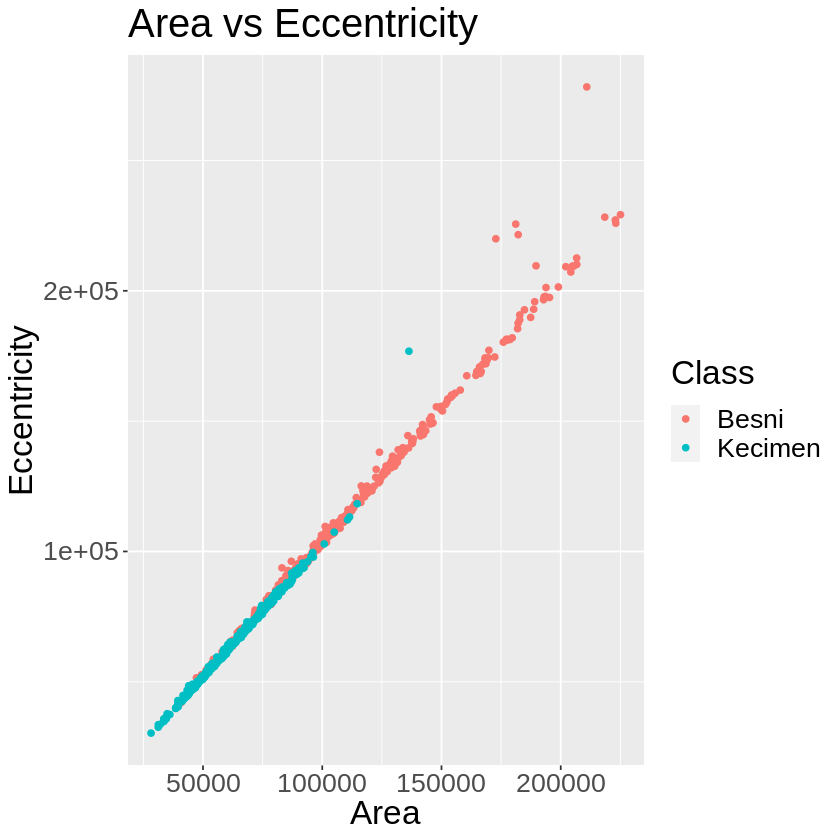

In [19]:
raisin_train |>
   ggplot(aes(x = Area, y = Eccentricity,color = Class)) +
     geom_point() +
     labs(x = "Area", y = "Eccentricity") +
  ggtitle("Area vs Eccentricity")+
    theme(text = element_text(size = 20))

According to the scatterplot, there are many overlaps between the two classes. The two factors "Eccentricity" and "Area" are not good predictors together for building model.

Take a look at predictors "MajorAxisLength" and "Eccentricity".

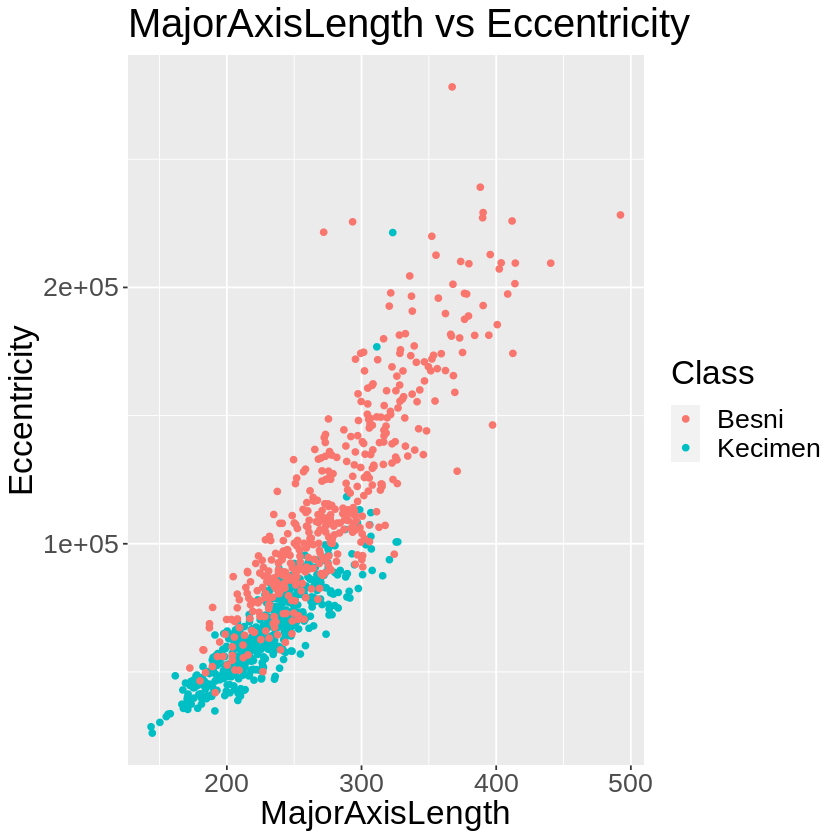

In [18]:
find_K <-raisin_data |>
   ggplot(aes(x = MajorAxisLength, y = Eccentricity,color = Class)) +
     geom_point() +
     labs(x = "MajorAxisLength", y = "Eccentricity") +
 ggtitle("MajorAxisLength vs Eccentricity")+
    theme(text = element_text(size = 20))
find_K

The discrimination between the “MajorAxisLength” and “Eccentricity” are relatively high, so they are good predictors for building models.

## Methods

After exploring the data, splitting the data into training and testing, visualizing the relationship between variables, we choose “MajorAxisLength” and “Eccentricity” as predictors of model. Then, we build our model using the k-nearest neighbors(knn) algorithm. We would find the best k value by tuning the classifier and applying cross-validation with different k values. Therefore, we will select the best k value with the highest accuracy and the lowest standard error. 

One of the visualization methods is to make a scatterplot between the predicted class and the real class and make a regression line to prove the accuracy of our prediction. If the visualization proves that there is enough correlation, then our model is reliable.

## Expected Outcomes and Significance

By building a knn model with the best k value and predictors "MajorAxisLength" and "Eccentricity" using the training data, we expect to have high prediction accuracy on the testing data in classifying raisins. The impacts of these findings are, when raisin images that are unclear and low resolution are encountered, with data collected on "MajorAxisLength" and "Eccentricity", we can predict the class of raisin with high accuracy. Further research could explore the color of the raisin images and determine which type of raisin tends to have a deeper or lighter color. Perhaps this could better classify the raisin when we have data with similar values on "MajorAxisLength" and "Eccentricity". 